In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data/goldstock.csv', parse_dates=True, index_col='Date')
print(data.head())

            Unnamed: 0   Close    Volume    Open    High     Low
Date                                                            
2024-01-19           0  2029.3  166078.0  2027.4  2041.9  2022.2
2024-01-18           1  2021.6  167013.0  2009.1  2025.6  2007.7
2024-01-17           2  2006.5  245194.0  2031.7  2036.1  2004.6
2024-01-16           3  2030.2  277995.0  2053.4  2062.8  2027.6
2024-01-12           4  2051.6  250946.0  2033.2  2067.3  2033.1


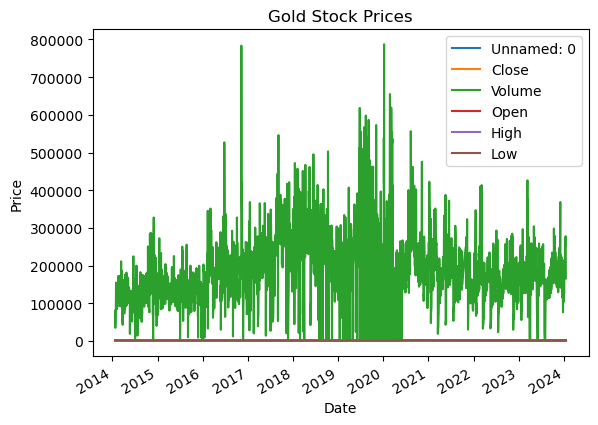

In [2]:
import matplotlib.pyplot as plt

data.plot()
plt.title('Gold Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


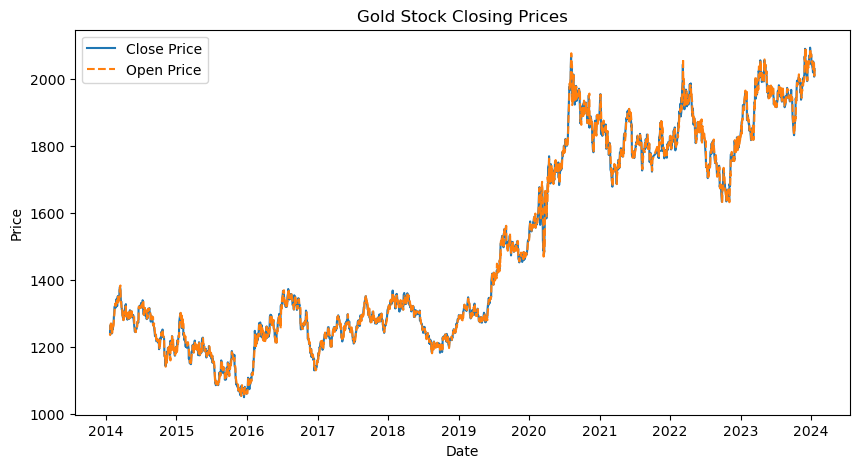

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Open'], label='Open Price', linestyle='--') 
plt.title('Gold Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

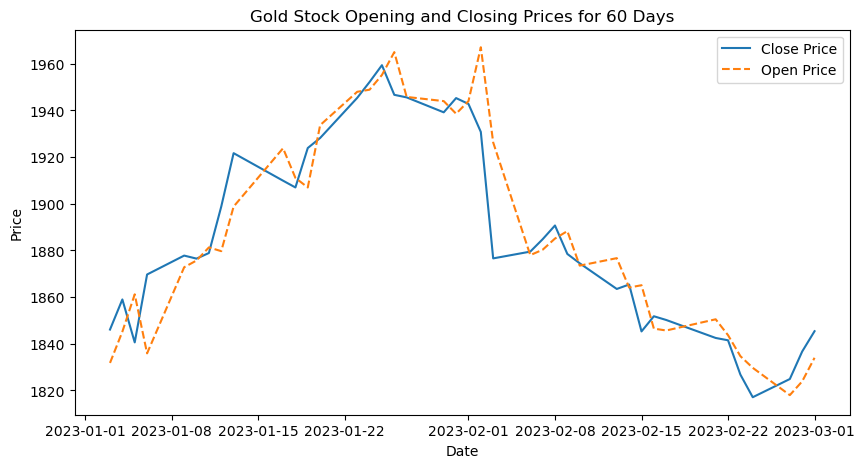

In [8]:
# Ensure the data is sorted
data.sort_index(inplace=True)

# Verify available dates and adjust if necessary
#print("Start date:", data.index.min())
#print("End date:", data.index.max())

start_date = '2023-01-01'  # Ensure this date is within the range printed above
end_date = '2023-03-01'

# Slice the data to this range
specific_period = data.loc[start_date:end_date]

# Plot the closing and opening prices for this specific period
plt.figure(figsize=(10, 5))
plt.plot(specific_period['Close'], label='Close Price')
plt.plot(specific_period['Open'], label='Open Price', linestyle='--')
plt.title('Gold Stock Opening and Closing Prices for 60 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")
print ('p-value: A p-value less than 0.05 typically rejects the null hypothesis of non-stationarity.')

ADF Statistic: -0.6413674258701237
p-value: 0.8613580932341661
The time series is not stationary.
p-value: A p-value less than 0.05 typically rejects the null hypothesis of non-stationarity.


In [17]:
# Check for duplicate dates
if data.index.duplicated().any():
    print("Duplicates found in Date index")
    # Optional: View the duplicates to decide on the action
    print(data[data.index.duplicated(keep=False)])

Duplicates found in Date index
            Unnamed: 0   Close    Volume    Open    High     Low
Date                                                            
2021-10-29         557  1783.9  248553.0  1801.5  1802.9  1772.4
2021-10-29         575  1783.9  248553.0  1801.5  1802.9  1772.4
2021-11-01         574  1795.8  140366.0  1785.3  1797.5  1780.2
2021-11-01         556  1795.8  140366.0  1785.3  1797.5  1780.2
2021-11-02         555  1789.4  141590.0  1794.8  1797.8  1787.4
2021-11-02         573  1789.4  141590.0  1794.8  1797.8  1787.4
2021-11-03         554  1763.9  248047.0  1789.2  1789.3  1758.5
2021-11-03         572  1763.9  248047.0  1789.2  1789.3  1758.5
2021-11-04         571  1793.5  213034.0  1769.9  1800.3  1769.3
2021-11-04         553  1793.5  213034.0  1769.9  1800.3  1769.3
2021-11-05         570  1816.8  276580.0  1792.6  1820.1  1785.3
2021-11-05         552  1816.8  276580.0  1792.6  1820.1  1785.3
2021-11-08         551  1828.0  180098.0  1820.6  1828.3  1

In [20]:
# Removing duplicates by keeping the first occurrence
data = data[~data.index.duplicated(keep='first')]

In [55]:
if result[1] > 0.05:  # Assuming a significance level of 5%
    data.loc[:, 'Price_diff'] = data['Close'].diff().dropna()

data_diff = data['Close'].diff().dropna()

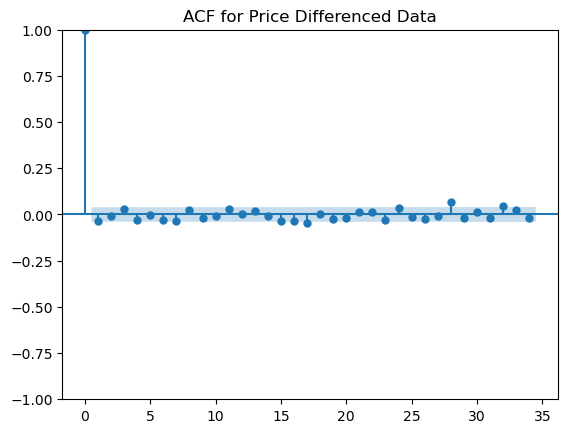

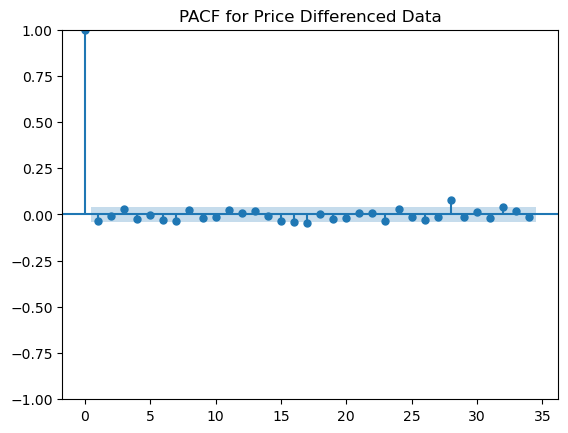

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming data['Price_diff'] is a differenced series
#plot_acf(data['Price_diff'].dropna())
plot_acf(data_diff)
plt.title('ACF for Price Differenced Data')
plt.show()

plot_pacf(data['Price_diff'].dropna())
plt.title('PACF for Price Differenced Data')
plt.show()

In [26]:
#pip install pmdarima
#from pmdarima.arima.utils import ndiffs
#ndiffs(data['Close'],test='adf')

In [77]:
from statsmodels.tsa.arima.model import ARIMA

# Initialize and fit the ARMA model
# The order (p, 0, q) is just an example. Adjust based on your ACF and PACF analysis
model = ARIMA(data['Price_diff'], order=(1, 1, 1))
results = model.fit()

# Print out the summary of the model
print(results.summary())

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Price_diff   No. Observations:                 2493
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10230.046
Date:                Tue, 02 Jul 2024   AIC                          20466.092
Time:                        18:53:21   BIC                          20483.555
Sample:                             0   HQIC                         20472.433
                               - 2493                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0338      0.015     -2.214      0.027      -0.064      -0.004
ma.L1         -0.9995      0.002   -419.959      0.000      -1.004      -0.995
sigma2       214.1288      3.446     62.137      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


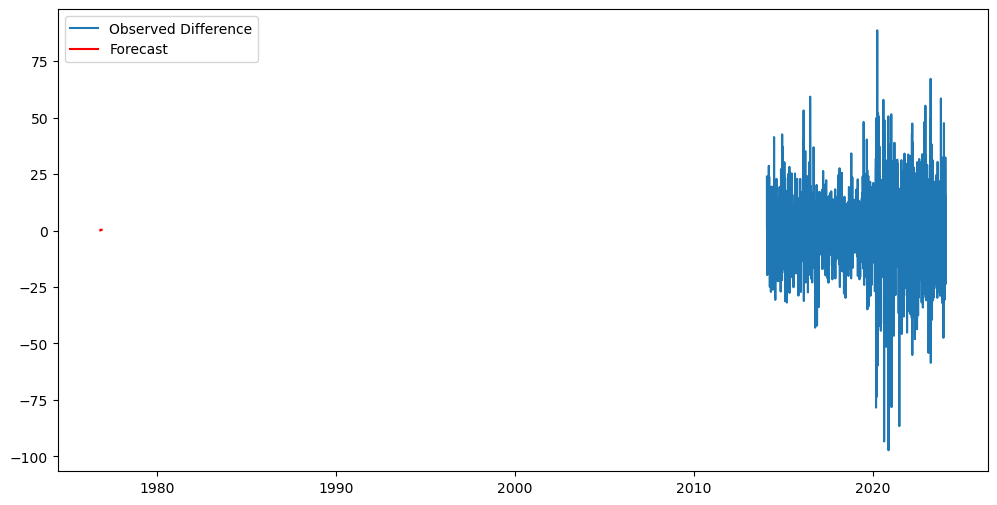

In [59]:
# Forecast
forecast = results.forecast(steps=30)  # Forecasting 5 future steps as an example

# Plot the forecast alongside the original series
plt.figure(figsize=(12, 6))
plt.plot(data['Price_diff'], label='Observed Difference')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()

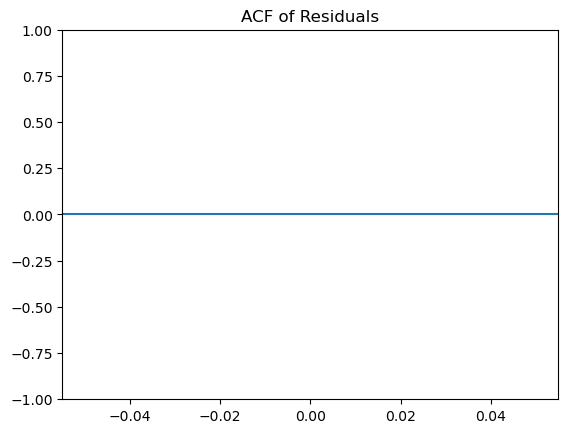

In [60]:
residuals = results.resid
plot_acf(residuals)
plt.title('ACF of Residuals')
plt.show()

In [38]:
# Assuming 'data' is your DataFrame with the 'Close' prices
train_size = int(len(data) * 0.8)  # Use 80% of the data for training
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Ensure both sets have a frequency
train = train.asfreq('D')
test = test.asfreq('D')

In [78]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model on the training set
p, d, q = 3, 1, 3  # Replace with your chosen p, d, q values
model = ARIMA(train['Close'], order=(p, d, q))
results = model.fit()

# Print the summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2920
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -8118.279
Date:                Tue, 02 Jul 2024   AIC                          16250.558
Time:                        18:53:36   BIC                          16292.411
Sample:                    01-22-2014   HQIC                         16265.634
                         - 01-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1226      0.164     -0.746      0.455      -0.445       0.199
ar.L2          0.5990      0.146      4.109      0.000       0.313       0.885
ar.L3          0.3484      0.127      2.737      0.0

In [71]:
# Forecast the same length as the test set
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create a DataFrame to hold the forecast results
forecast_df = pd.DataFrame({
    'forecast': forecast_mean,
    'lower CI': forecast_conf_int.iloc[:, 0],
    'upper CI': forecast_conf_int.iloc[:, 1]
}, index=test.index)

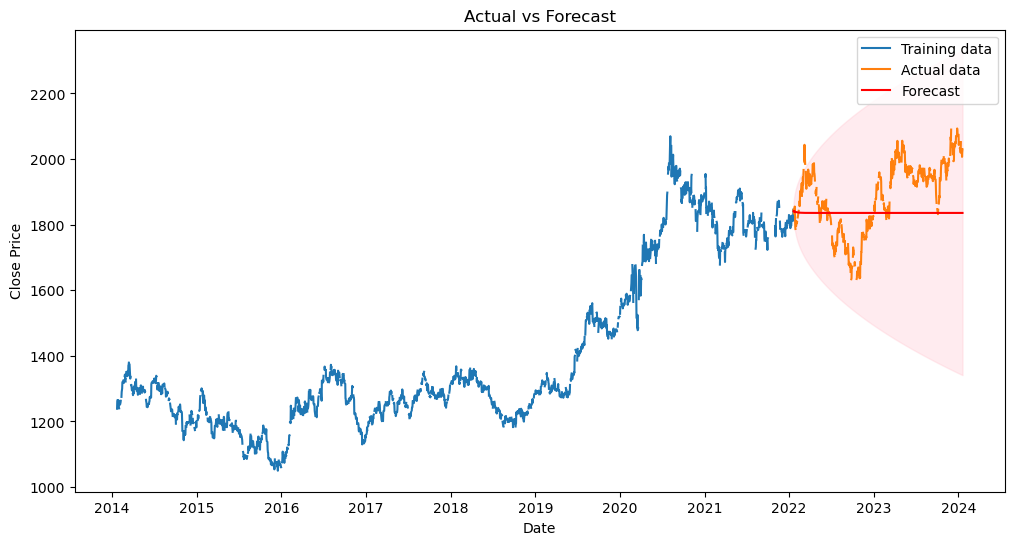

In [72]:
import matplotlib.pyplot as plt

# Plot the actual vs forecast values
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Training data')
plt.plot(test['Close'], label='Actual data')
plt.plot(forecast_df['forecast'], label='Forecast', color='r')
plt.fill_between(forecast_df.index, forecast_df['lower CI'], forecast_df['upper CI'], color='pink', alpha=0.3)
plt.title('Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()